In [1]:
import mesa

# Data visualization tools.
import seaborn as sns

# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

In [2]:
# update model so that the agent will check its number of apples, and if it has any apples, then it will give 
# one apple to another random agent.

# The agent’s step method is called by the scheduler during each step of the model. To allow the agent to choose 
# another agent at random, we use the model.random random-number generator. 


# The model.schedule let's you get access to other agents

In [3]:
class AppleTraderAgent(mesa.Agent):
    """An agent that trades apples and begins with 1 apple."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's number of apples and set initial value
        self.NumberApples = 1

    def step(self):
        # Verify agent has some apples
        if self.NumberApples > 0:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent is not None:
                other_agent.NumberApples += 1
                self.NumberApples -= 1
                
class AppleTradingModel(mesa.Model):
    """A model with some number of apple trading agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = AppleTraderAgent(i, self)
            # Add the agent to the scheduler
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""

        # The model's step will call the step method of each agent
        self.schedule.step()


In [4]:
# Run model with 10 agents
model = AppleTradingModel(10)
for i in range(100):
    model.step()


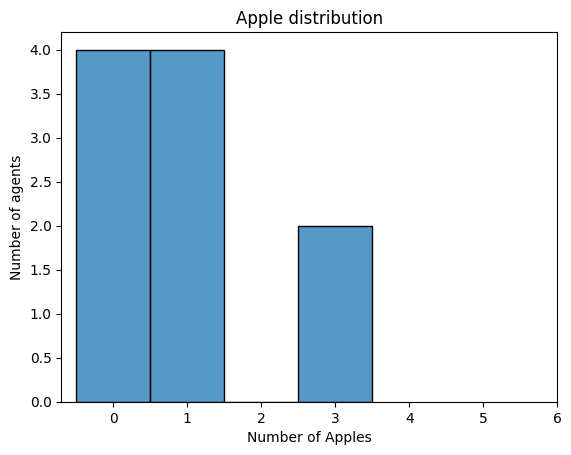

In [5]:
# now visualize how many apples each agent has

# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

all_agents_NumberApples = [a.NumberApples for a in model.schedule.agents]

# Create a histogram with seaborn
ax = sns.histplot(all_agents_NumberApples, discrete=True)
ax.set(title="Apple distribution", xlabel="Number of Apples", ylabel="Number of agents" );
ax.set_xticks(range(0,7), labels=range(0,7));